In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_data = pd.read_csv('/home/adarsh/Desktop/Machine Learning Projects/Churn_Modelling.csv')

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.shape

(10000, 14)

### Checking null value

In [5]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploratory data analysis

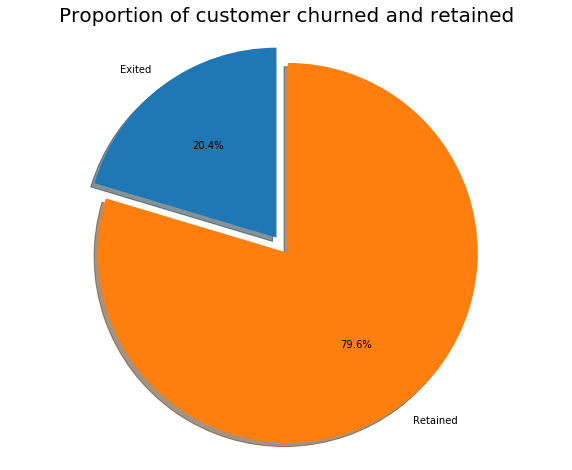

In [6]:
labels = 'Exited', 'Retained'
sizes = [bank_data.Exited[bank_data['Exited']==1].count(), bank_data.Exited[bank_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Conclusion : - 20 Percent customer has churned only. Machine learning model accuracy must be 80 percent so that it is useful for the bank.

In [7]:
Bank_data_geography_wise = bank_data.groupby('Geography')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [8]:
Bank_data_geography_wise.head()

,Geography,0,1
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [9]:
Bank_data_geography_wise.columns =['Geography', 'Not_Exited', 'Exited']

In [10]:
Bank_data_geography_wise.head()

,Geography,Not_Exited,Exited
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [11]:
Bank_data_geography_wise["Total"] = Bank_data_geography_wise["Not_Exited"] + Bank_data_geography_wise["Exited"]

In [12]:
Bank_data_geography_wise["Percentage_Exited"] = (Bank_data_geography_wise["Exited"] / Bank_data_geography_wise["Total"]) * 100

In [13]:
Bank_data_geography_wise["Percentage_Not_Exited"] = (Bank_data_geography_wise["Not_Exited"] / Bank_data_geography_wise["Total"]) * 100

In [14]:
Bank_data_geography_wise.head()

,Geography,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,France,4204,810,5014,16.154767,83.845233
1,Germany,1695,814,2509,32.443204,67.556796
2,Spain,2064,413,2477,16.673395,83.326605


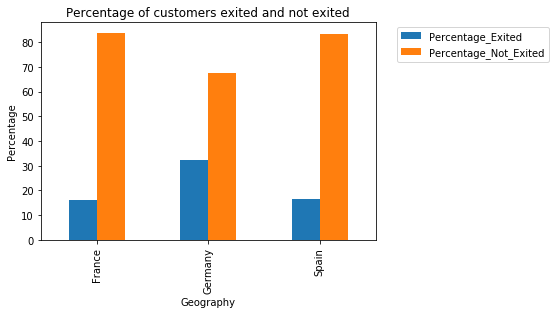

In [15]:
Bank_data_geography_wise.plot(x="Geography", y=["Percentage_Exited", "Percentage_Not_Exited"], kind="bar")
plt.axis(aspect='equal')
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.title('Percentage of customers exited and not exited')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion : - In geograpghy Germany more customers exited compared to spain and france

In [16]:
bank_data_gender_wise = bank_data.groupby('Gender')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [17]:
bank_data_gender_wise.head()

,Gender,0,1
0,Female,3404,1139
1,Male,4559,898


In [18]:
bank_data_gender_wise.columns = ['Gender','Not_Exited','Exited']

In [19]:
bank_data_gender_wise["Total"] = bank_data_gender_wise['Not_Exited'] + bank_data_gender_wise['Exited']

In [20]:
bank_data_gender_wise.head()

,Gender,Not_Exited,Exited,Total
0,Female,3404,1139,4543
1,Male,4559,898,5457


In [21]:
bank_data_gender_wise["Percentage_Exited"] = (bank_data_gender_wise["Exited"] / bank_data_gender_wise["Total"]) * 100

In [22]:
bank_data_gender_wise["Percentage_Not_Exited"] = (bank_data_gender_wise["Not_Exited"] / bank_data_gender_wise["Total"]) * 100

In [23]:
bank_data_gender_wise.head()

,Gender,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Female,3404,1139,4543,25.071539,74.928461
1,Male,4559,898,5457,16.455928,83.544072


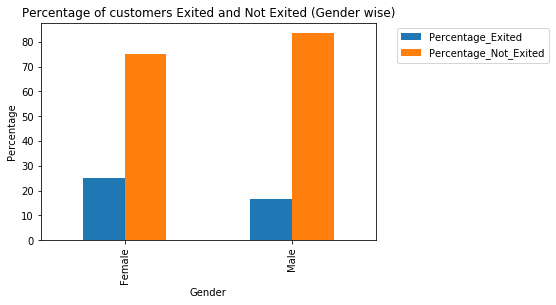

In [24]:
bank_data_gender_wise.plot(x = "Gender", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.axis(aspects = 'equal')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited (Gender wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion : - More female exited than men

In [25]:
print("Min Age in dataset", min(bank_data["Age"].unique()))
print("Max Tenure in dataset", max(bank_data["Age"].unique()))

Min Age in dataset 18
Max Tenure in dataset 92


In [26]:
bank_data["Age_Group"] = pd.cut(x=bank_data['Age'], bins = [0, 20 , 35, 50, 70, 100], 
                                labels = ["Teenager","Younger","Elder","Older","Senior Citizen"])

In [27]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder


In [28]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Elder
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Younger
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Elder
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Elder
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,Younger


In [29]:
bank_data_age_group_wise = bank_data.groupby('Age_Group')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None , axis = 1).reset_index()

In [30]:
bank_data_age_group_wise.head()

,Age_Group,0,1
0,Teenager,84,5
1,Younger,3722,342
2,Elder,3459,1127
3,Older,576,552
4,Senior Citizen,122,11


In [31]:
bank_data_age_group_wise.columns = ["Age_Group","Not_Exited","Exited"]

In [32]:
bank_data_age_group_wise.head()

,Age_Group,Not_Exited,Exited
0,Teenager,84,5
1,Younger,3722,342
2,Elder,3459,1127
3,Older,576,552
4,Senior Citizen,122,11


In [33]:
bank_data_age_group_wise["Total"] = bank_data_age_group_wise["Not_Exited"] + bank_data_age_group_wise["Exited"]

In [34]:
bank_data_age_group_wise["Percentage_Exited"] = (bank_data_age_group_wise["Exited"] / bank_data_age_group_wise["Total"]) * 100

In [35]:
bank_data_age_group_wise["Percentage_Not_Exited"] = (bank_data_age_group_wise["Not_Exited"] / bank_data_age_group_wise["Total"]) * 100

In [36]:
bank_data_age_group_wise.head()

,Age_Group,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Teenager,84,5,89,5.617978,94.382022
1,Younger,3722,342,4064,8.415354,91.584646
2,Elder,3459,1127,4586,24.574793,75.425207
3,Older,576,552,1128,48.936170,51.063830
4,Senior Citizen,122,11,133,8.270677,91.729323


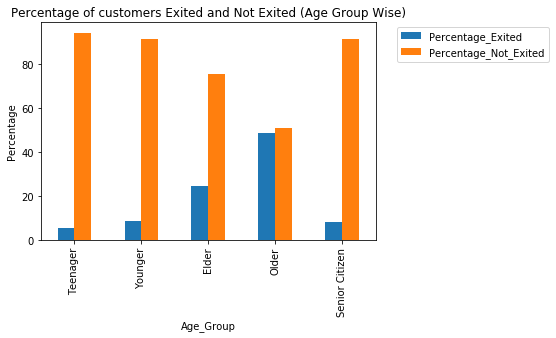

In [37]:
bank_data_age_group_wise.plot(x = "Age_Group", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.axis(aspects = 'equal')
plt.xlabel('Age_Group')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited (Age Group Wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

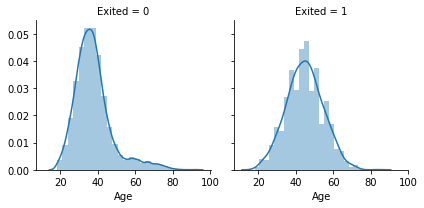

In [38]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

### Younger customer stick with the company compare to older

### Conclusion : - Most of the customer exited are from older age group (50 to 70 years)

Text(0, 0.5, 'Customer _Exited (1 = True, 0 = False) ')

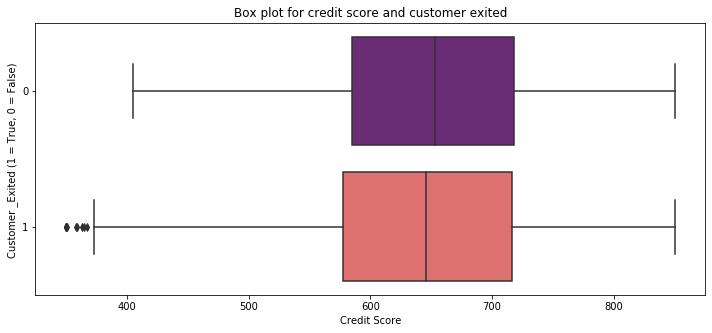

In [39]:
plt.figure(figsize=(12,5))
plt.title("Box plot for credit score and customer exited")
sns.boxplot(y="Exited", x="CreditScore", data = bank_data, orient="h", palette = 'magma')
plt.xlabel('Credit Score')
plt.ylabel('Customer _Exited (1 = True, 0 = False) ')

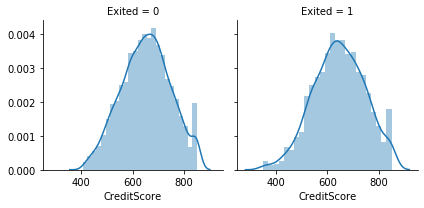

In [40]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

### It seems that there is no relation between creditscore and customer exited

Text(0, 0.5, 'Customer _Exited (1 = True, 0 = False) ')

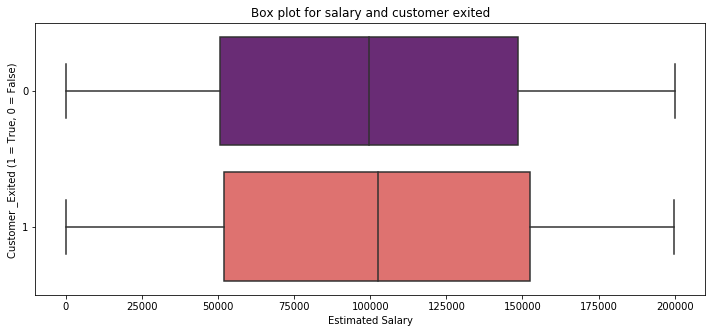

In [41]:
plt.figure(figsize=(12,5))
plt.title("Box plot for salary and customer exited")
sns.boxplot(y="Exited", x="EstimatedSalary", data = bank_data, orient="h", palette = 'magma')
plt.xlabel('Estimated Salary')
plt.ylabel('Customer _Exited (1 = True, 0 = False) ')

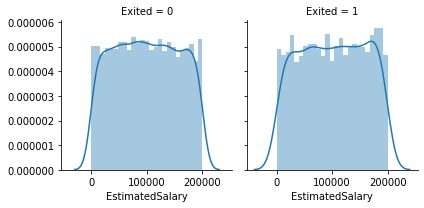

In [42]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

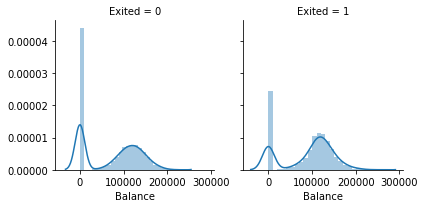

In [43]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

### It seems that there is no so-relation between balance and estimated salary

### Data Prepration

In [44]:
label = {'Female':0, 'Male':1}
bank_data.replace({'Gender':label}, inplace = True)
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,Elder
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Elder
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Elder
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,Elder
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Elder


In [45]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,Elder
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,Younger
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,Elder
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,Elder
9999,10000,15628319,Walker,792,France,0,28,4,130142.79,1,1,0,38190.78,0,Younger


In [46]:
bank_data = pd.get_dummies(bank_data, columns=["Geography"])

In [47]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,Elder,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,Elder,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,Elder,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,Elder,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,Elder,0,0,1


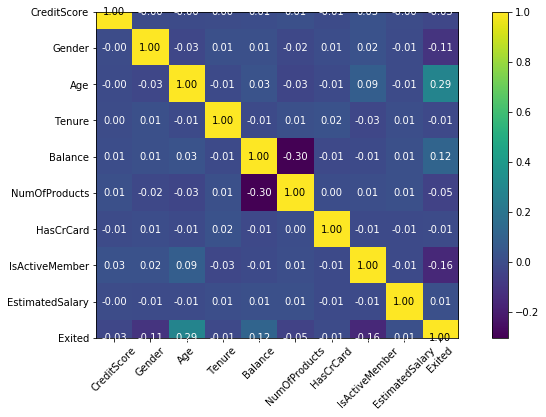

In [48]:
plt.rcParams['figure.figsize']=(12,6)
col = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
             'IsActiveMember','EstimatedSalary','Exited']
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(bank_data[col].values.T)
hm = heatmap(cm, row_names =col, column_names =col)
plt.show()

### Feature Engineering (Adding Features in dataset having some kind of relation with churn)

(-1, 5)

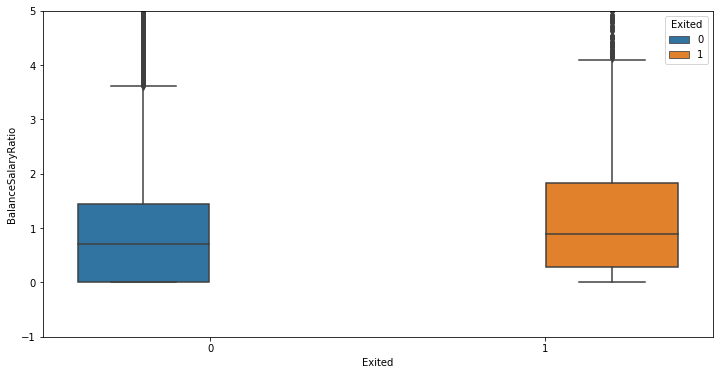

In [49]:
bank_data['BalanceSalaryRatio'] = bank_data.Balance/bank_data.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = bank_data)
plt.ylim(-1, 5)

### Customers having high balance salary ration has churned more

In [50]:
label = {'Teenager':0,'Younger':1,'Elder':2,'Older':3,'Senior Citizen':4}
bank_data.replace({'Age_Group':label}, inplace = True)
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryRatio
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,2,1,0,0,0.000000
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,2,0,0,1,0.744677
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,2,1,0,0,1.401375
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,2,1,0,0,0.000000
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,2,0,0,1,1.587055


In [51]:
bank_data = pd.get_dummies(bank_data, columns=["NumOfProducts","Tenure"])

In [52]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,...,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
0,1,15634602,Hargrave,619,0,42,0.00,1,1,101348.88,...,0,1,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,0,41,83807.86,0,1,112542.58,...,1,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,0,42,159660.80,1,0,113931.57,...,0,0,0,0,0,0,0,1,0,0
3,4,15701354,Boni,699,0,39,0.00,0,0,93826.63,...,1,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,0,43,125510.82,1,1,79084.10,...,0,1,0,0,0,0,0,0,0,0


In [53]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [54]:
bank_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryRatio,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
0,1,15634602,Hargrave,619,0,42,0.00,1,1,101348.88,1,2,1,0,0,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,0,41,83807.86,0,1,112542.58,0,2,0,0,1,0.744677,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,0,42,159660.80,1,0,113931.57,1,2,1,0,0,1.401375,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,4,15701354,Boni,699,0,39,0.00,0,0,93826.63,0,2,1,0,0,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,0,43,125510.82,1,1,79084.10,0,2,0,0,1,1.587055,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,6,15574012,Chu,645,1,44,113755.78,1,0,149756.71,1,2,0,0,1,0.759604,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,7,15592531,Bartlett,822,1,50,0.00,1,1,10062.80,0,2,1,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,8,15656148,Obinna,376,0,29,115046.74,1,0,119346.88,1,1,0,1,0,0.963969,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8,9,15792365,He,501,1,44,142051.07,0,1,74940.50,0,2,1,0,0,1.895518,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,10,15592389,H?,684,1,27,134603.88,1,1,71725.73,0,1,1,0,0,1.876647,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Dropping columns

In [55]:
bank_data.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [56]:
bank_data.head()

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryRatio,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
0,619,0,42,0.00,1,1,101348.88,1,2,1,0,0,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,608,0,41,83807.86,0,1,112542.58,0,2,0,0,1,0.744677,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,502,0,42,159660.80,1,0,113931.57,1,2,1,0,0,1.401375,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,699,0,39,0.00,0,0,93826.63,0,2,1,0,0,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,850,0,43,125510.82,1,1,79084.10,0,2,0,0,1,1.587055,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
bank_data.columns

Index(['CreditScore', 'Gender', 'Age', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_Group',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'BalanceSalaryRatio', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4', 'Tenure_0', 'Tenure_1',
       'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7',
       'Tenure_8', 'Tenure_9', 'Tenure_10'],
      dtype='object')

In [58]:
numerical_vars = ['CreditScore',  'Age', 'Balance', 'EstimatedSalary', 'BalanceSalaryRatio']
categorical_vars = ['Gender', 'HasCrCard','IsActiveMember',
                    'Exited', 'Age_Group','Geography_France', 
                    'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1', 
                    'NumOfProducts_2','NumOfProducts_3', 'NumOfProducts_4', 'Tenure_0',
                    'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5',
                    'Tenure_6', 'Tenure_7','Tenure_8', 'Tenure_9', 'Tenure_10']

### standardize numerical variables

In [59]:
from sklearn.preprocessing import StandardScaler
bank_data[['CreditScore',  'Age', 'Balance', 'EstimatedSalary', 'BalanceSalaryRatio']] = StandardScaler().fit_transform(bank_data[['CreditScore',  'Age', 'Balance', 'EstimatedSalary',  'BalanceSalaryRatio']])

In [60]:
bank_data.head(10)

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryRatio,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
0,-0.326221,0,0.293517,-1.225848,1,1,0.021886,1,2,1,0,0,-0.035804,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-0.440036,0,0.198164,0.117350,0,1,0.216534,0,2,0,0,1,-0.028930,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-1.536794,0,0.293517,1.333053,1,0,0.240687,1,2,1,0,0,-0.022868,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.501521,0,0.007457,-1.225848,0,0,-0.108918,0,2,1,0,0,-0.035804,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.063884,0,0.388871,0.785728,1,1,-0.365276,0,2,0,0,1,-0.021154,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,-0.057205,1,0.484225,0.597329,1,0,0.863650,1,2,0,0,1,-0.028792,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1.774174,1,1.056346,-1.225848,1,1,-1.565487,0,2,1,0,0,-0.035804,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,-2.840488,0,-0.946079,0.618019,1,0,0.334854,1,1,0,1,0,-0.026906,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8,-1.547141,1,0.484225,1.050820,0,1,-0.437329,0,2,1,0,0,-0.018307,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0.346319,1,-1.136786,0.931463,1,1,-0.493230,0,1,1,0,0,-0.018481,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Dividing the dataset into training and test set

In [61]:
Predictors = bank_data.drop(['Exited'], axis = 1)
Target = bank_data['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size = 0.20, random_state = 0, stratify = Target)

In [62]:
X_train.head()

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Age_Group,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryRatio,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
493,-1.236738,0,0.770285,-1.225848,0,0,1.650357,2,1,0,0,-0.035804,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6839,0.760190,1,-0.278604,0.290559,1,1,-1.555673,2,0,1,0,0.046380,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
170,-1.723036,0,-0.946079,0.859510,1,0,1.111638,1,1,0,0,-0.028481,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4958,0.046263,1,-0.183251,0.522604,1,0,-1.709595,2,1,0,0,0.531371,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4271,-1.919625,1,-0.564665,-1.225848,0,1,-0.371988,1,1,0,0,-0.035804,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [63]:
y_train.head()

493     1
6839    0
170     0
4958    0
4271    0
Name: Exited, dtype: int64

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 27)
(8000,)
(2000, 27)
(2000,)


### Building machine learning model for predicting churn

In [65]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [67]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [68]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train,y_train)
best_model(log_primal_Grid)

0.841375
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [69]:
# Fit best_primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

### Accuracy

In [70]:
y_test.head(10)

1344    1
8167    0
4747    0
5004    1
3124    1
1940    1
2090    0
3298    0
8364    1
9485    0
Name: Exited, dtype: int64

In [71]:
X_test.head(10)

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Age_Group,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryRatio,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
1344,-1.971359,0,0.102810,0.689513,1,0,-0.148321,2,0,1,0,-0.023755,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8167,0.646375,0,-1.422847,1.141152,1,1,0.373903,1,0,1,0,-0.024592,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4747,0.129037,1,2.391296,-1.225848,0,1,-1.464392,3,0,0,1,-0.035804,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5004,-1.536794,0,1.723821,0.400348,1,0,-0.982860,3,0,1,0,-0.014306,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3124,1.132674,1,0.007457,1.636361,1,0,-0.573123,2,1,0,0,-0.011247,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1940,-1.236738,0,-0.755372,0.650171,1,0,0.320268,1,0,1,0,-0.026686,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2090,0.170424,1,0.007457,-1.225848,1,0,-0.542823,2,0,0,1,-0.035804,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3298,-0.957375,1,-1.327494,0.558981,1,0,1.689761,1,0,1,0,-0.030593,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8364,-2.116214,0,0.579578,0.780613,1,1,0.489859,2,0,0,1,-0.026794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9485,2.063884,1,-0.183251,0.186799,1,0,0.166393,2,0,0,1,-0.028384,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [72]:
y_pred = log_primal.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred, y_test))

: 0.840


### Confusion matrix

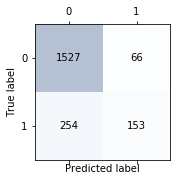

In [73]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [74]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(X_train,y_train)
best_model(log_pol2_Grid)

0.841625
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [75]:
# Fit best_logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='warn', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy

In [76]:
y_pred_1 = log_pol2.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_1, y_test))

: 0.840


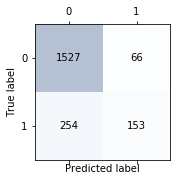

In [77]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_1)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [78]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
best_model(SVM_grid)

0.858125
{'C': 150, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
SVC(C=150, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [79]:
# Fit best_SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Accuracy

In [80]:
y_pred_2 = SVM_RBF.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_2, y_test))

: 0.819


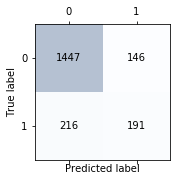

In [81]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [82]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train, y_train)
best_model(SVM_grid)

0.85675
{'C': 50, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [83]:
# Fit best_SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Accuracy

In [84]:
y_pred_3 = SVM_POL.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_3, y_test))

: 0.852


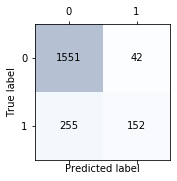

In [85]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_3)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [86]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train, y_train)
best_model(RanFor_grid)

0.864875
{'max_depth': 7, 'max_features': 7, 'min_samples_split': 7, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [87]:
# Fit best_Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Accuracy

In [88]:
y_pred_4 = SVM_POL.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_4, y_test))

: 0.852


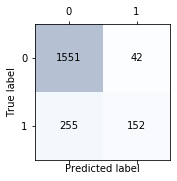

In [89]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_4)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [90]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train, y_train)
best_model(xgb_grid)

0.8645
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [91]:
# Fit best_Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train, y_train)

[20:29:34] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=20, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Accuracy

In [92]:
y_pred_5 = SVM_POL.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_5, y_test))

: 0.852


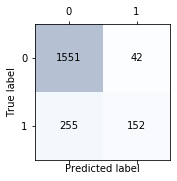

In [93]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_5)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

roc_auc_score for Logistic Regression:  0.6672450570755656
roc_auc_score for Logistic Regression with degree2 polynomial:  0.6672450570755656
roc_auc_score for SVM with RBF:  0.688818248140282
roc_auc_score for SVM with Polynomial:  0.6735495125325633
roc_auc_score for Random Forest:  0.6735495125325633
roc_auc_score for Extreme Gradiant Boosting Classifier:  0.6735495125325633


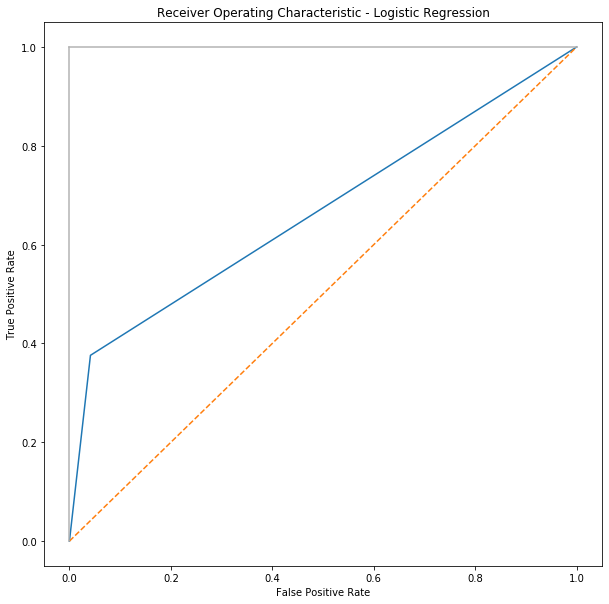

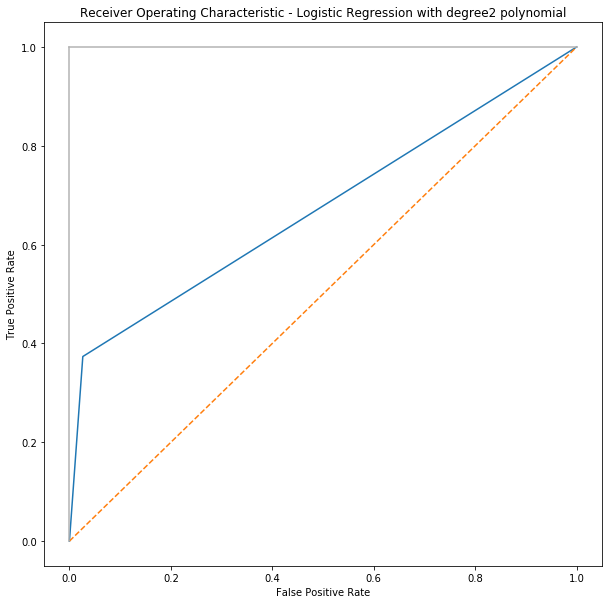

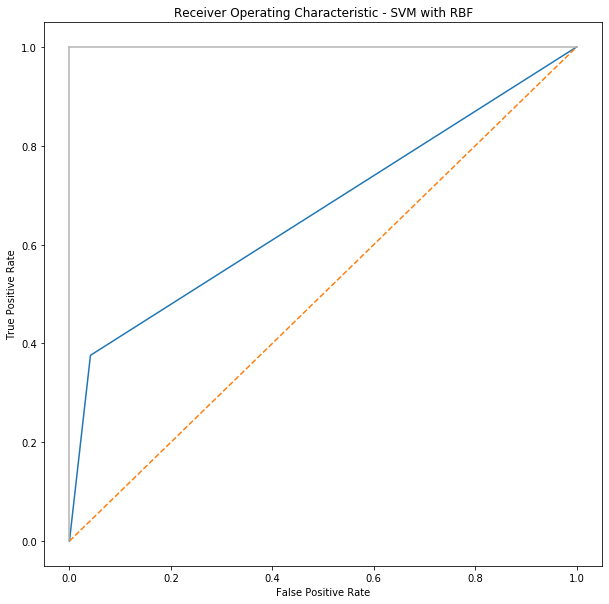

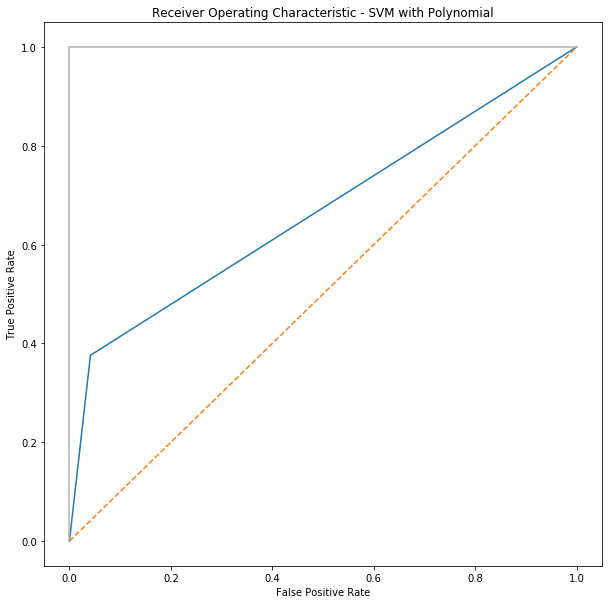

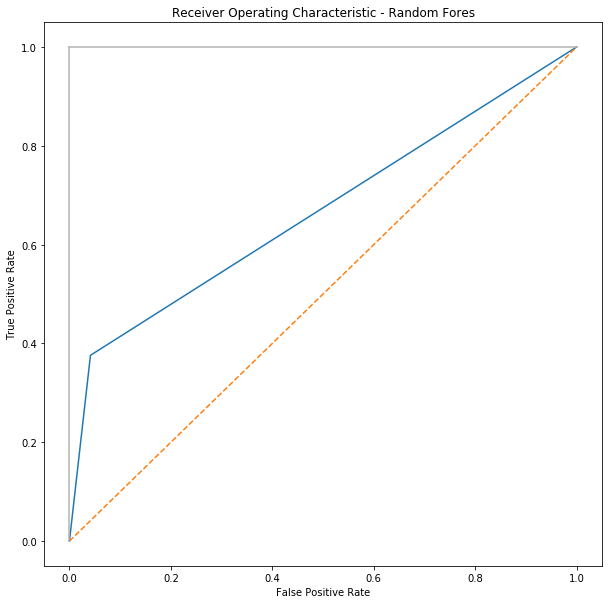

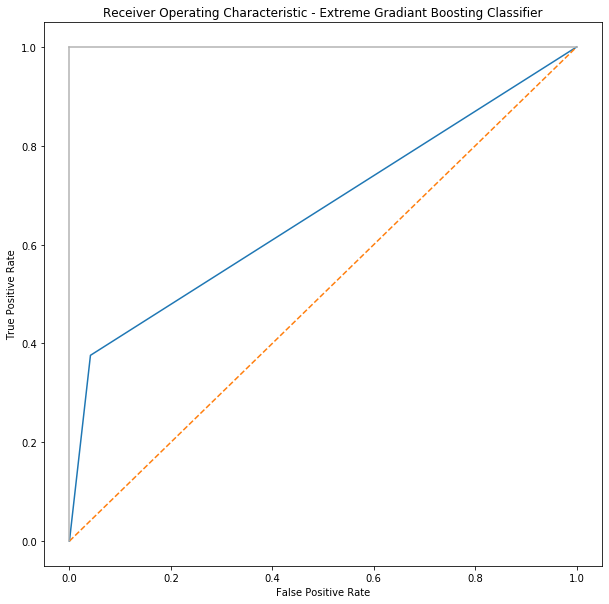

In [107]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_1)
false_positive_rate2, true_positive_rate2, threshold3 = roc_curve(y_test, y_pred_2)
false_positive_rate2, true_positive_rate2, threshold4 = roc_curve(y_test, y_pred_3)
false_positive_rate2, true_positive_rate2, threshold5 = roc_curve(y_test, y_pred_4)
false_positive_rate2, true_positive_rate2, threshold6 = roc_curve(y_test, y_pred_5)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred))
print('roc_auc_score for Logistic Regression with degree2 polynomial: ', roc_auc_score(y_test, y_pred_1))
print('roc_auc_score for SVM with RBF: ', roc_auc_score(y_test, y_pred_2))
print('roc_auc_score for SVM with Polynomial: ', roc_auc_score(y_test, y_pred_3))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_pred_4))
print('roc_auc_score for Extreme Gradiant Boosting Classifier: ', roc_auc_score(y_test, y_pred_5))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression with degree2 polynomial')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM with RBF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM with Polynomial')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Fores')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Extreme Gradiant Boosting Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()